In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("All libraries are sucessfully imported")


All libraries are sucessfully imported


In [3]:
# Load the dataset and display the first 10 rows
df = pd.read_csv(r"laptop_price.csv", encoding= "ISO-8859-1")
df.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
df.shape

(1303, 13)

In [6]:
categorical = df.select_dtypes(include="object")
categorical.head()

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg


In [7]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [8]:
# Convert Ram and Weight to numerical features
df['Ram'] = df['Ram'].str.replace('GB','').astype('int64')
df['Weight'] = df['Weight'].str.replace('kg','').astype('float64')

# Display the data types after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 132.5+ KB


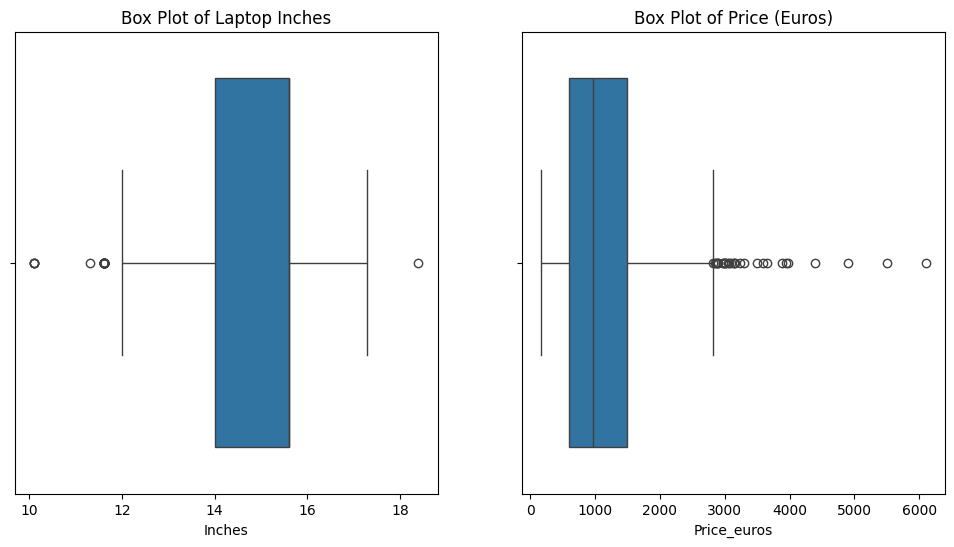

In [9]:
# Detect and visualize outliers using box plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Inches'])
plt.title('Box Plot of Laptop Inches')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Price_euros'])
plt.title('Box Plot of Price (Euros)')

plt.show()

# Removing outliers beyond the 99th percentile in Price_euros
df = df[df['Price_euros'] < df['Price_euros'].quantile(0.99)]

In [10]:
# Create new features from 'ScreenResolution'
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df['IPS_Panel'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS Panel' in x else 0)

# Extract resolution values and calculate total pixels
def get_resolution(resolution_str):
    res = resolution_str.split()[-1]
    width, height = res.split('x')
    return int(width), int(height)

df['X_res'], df['Y_res'] = zip(*df['ScreenResolution'].apply(get_resolution))
df['Pixels'] = df['X_res'] * df['Y_res']

# Display the new features
df[['ScreenResolution', 'Touchscreen', 'IPS_Panel', 'Pixels']].head()

,ScreenResolution,Touchscreen,IPS_Panel,Pixels
0,IPS Panel Retina Display 2560x1600,0,1,4096000
1,1440x900,0,0,1296000
2,Full HD 1920x1080,0,0,2073600
3,IPS Panel Retina Display 2880x1800,0,1,5184000
4,IPS Panel Retina Display 2560x1600,0,1,4096000


In [12]:
# Create new features from 'Memory'
def get_memory_info(memory_str):
    mem_str = memory_str.replace('.0', '').replace('GB', '').replace('SSD', 'SSD ').replace('HDD', 'HDD ').strip()
    mem_list = mem_str.split()

    storage_size_gb = 0
    storage_type = 'None'

    # Check for storage type first
    for word in mem_list:
        if word in ['SSD', 'HDD', 'Flash', 'Hybrid']:
            storage_type = word

    # Extract size
    for word in mem_list:
        if word.isdigit():
            storage_size_gb += int(word)

    return storage_size_gb, storage_type

df[['Storage_Size_GB', 'Storage_Type']] = df['Memory'].apply(lambda x: pd.Series(get_memory_info(x)))
df[['Memory', 'Storage_Size_GB', 'Storage_Type']].head()

,Memory,Storage_Size_GB,Storage_Type
0,128GB SSD,128,SSD
1,128GB Flash Storage,128,Flash
2,256GB SSD,256,SSD
3,512GB SSD,512,SSD
4,256GB SSD,256,SSD


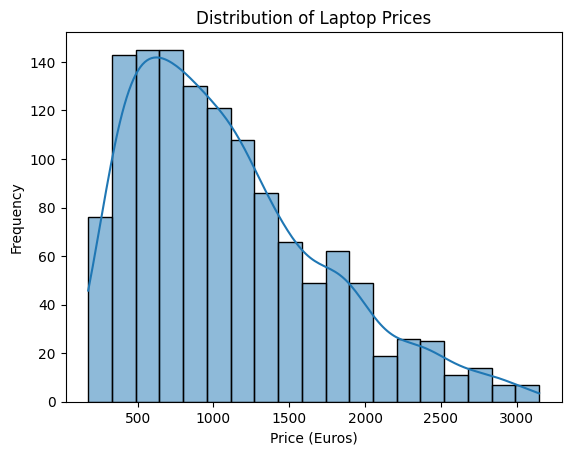

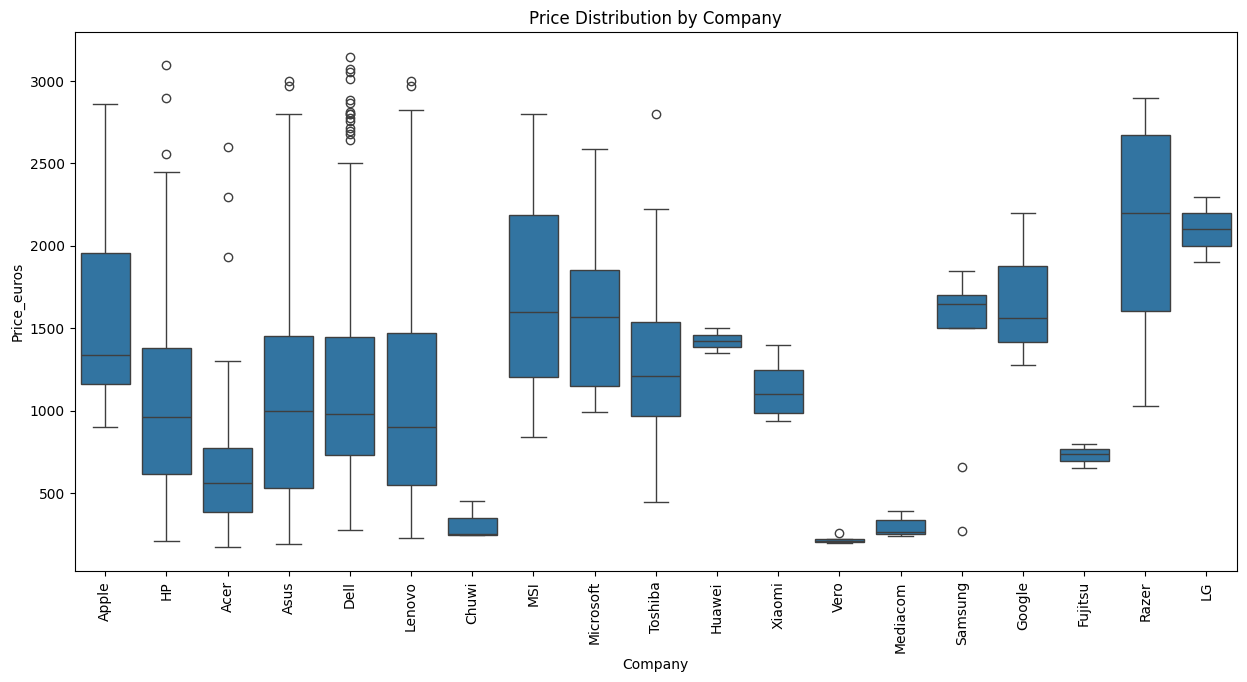

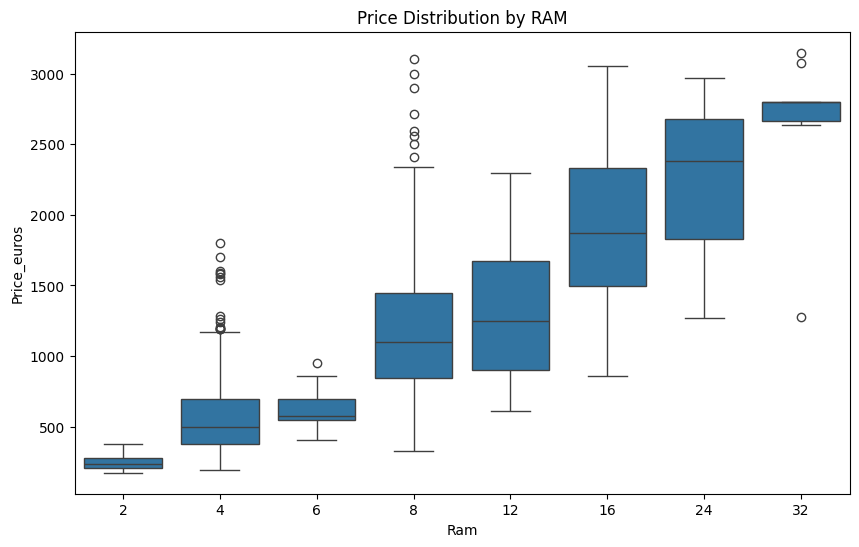

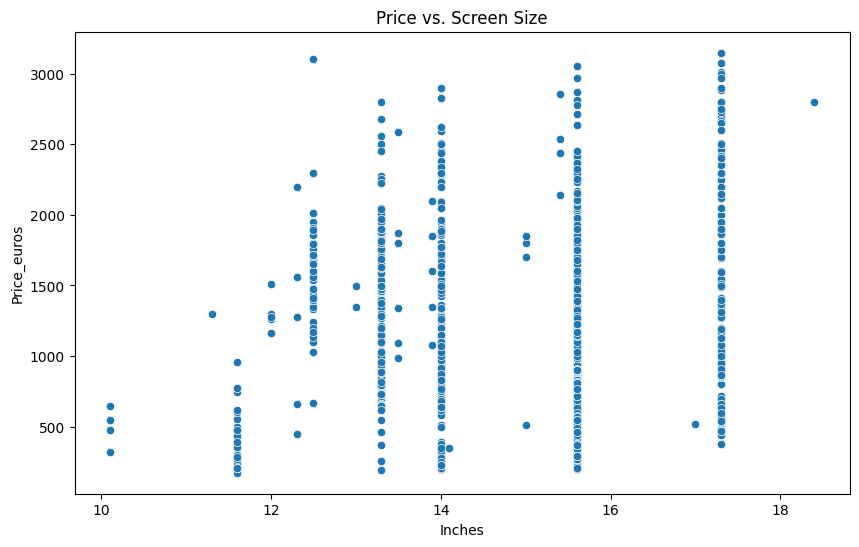

In [13]:
# Exploratory Data Analysis (EDA) and Visualization
# Distribution of Price
sns.histplot(df['Price_euros'], kde=True)
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price (Euros)')
plt.ylabel('Frequency')
plt.show()

# Price vs. Company
plt.figure(figsize=(15, 7))
sns.boxplot(x='Company', y='Price_euros', data=df)
plt.xticks(rotation='vertical')
plt.title('Price Distribution by Company')
plt.show()

# Price vs. Ram
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ram', y='Price_euros', data=df)
plt.title('Price Distribution by RAM')
plt.show()

# Price vs. Inches
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inches', y='Price_euros', data=df)
plt.title('Price vs. Screen Size')
plt.show()

In [14]:
# Drop the original features that are no longer needed
df.drop(columns=['laptop_ID', 'Product', 'ScreenResolution', 'Memory', 'Cpu', 'Gpu', 'OpSys'], inplace=True)

# One-Hot Encoding for selected categorical features
df_encoded = pd.get_dummies(df, columns=['Company', 'TypeName', 'Storage_Type'], drop_first=True)

# Display the first few rows of the encoded DataFrame
df_encoded.head()

,Inches,Ram,Weight,Price_euros,Touchscreen,IPS_Panel,X_res,Y_res,Pixels,Storage_Size_GB,...,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Storage_Type_HDD,Storage_Type_Hybrid,Storage_Type_SSD
0,13.3,8,1.37,1339.69,0,1,2560,1600,4096000,128,...,False,False,False,False,False,True,False,False,False,True
1,13.3,8,1.34,898.94,0,0,1440,900,1296000,128,...,False,False,False,False,False,True,False,False,False,False
2,15.6,8,1.86,575.00,0,0,1920,1080,2073600,256,...,False,False,False,False,True,False,False,False,False,True
3,15.4,16,1.83,2537.45,0,1,2880,1800,5184000,512,...,False,False,False,False,False,True,False,False,False,True
4,13.3,8,1.37,1803.60,0,1,2560,1600,4096000,256,...,False,False,False,False,False,True,False,False,False,True
